# Importing Libraries

In [ ]:
%pip uninstall tensorflow
%pip install tensorflow==1.15.0
%pip install keras==2.2.4




In [18]:
#Standart Imports
import pandas as pd
import numpy as np

In [19]:
#For Image processing
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, exposure
import IPython.display as ipd

c:\Users\rohit\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [20]:
#for Files
import os
import glob

In [21]:
# For calculations and data spliting
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import xgboost as xgb
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ImportError: Traceback (most recent call last):
  File "c:\Users\rohit\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

#Loading Datasets

In [8]:
indicator_df = pd.read_csv('/content/drive/MyDrive/ML_IQA/koniq10k_indicators.csv')
scores_df = pd.read_csv('/content/drive/MyDrive/ML_IQA/koniq10k_scores_and_distributions.csv')

In [9]:
indicator_df.head()


,image_id,brightness,contrast,colorfulness,sharpness,quality_factor,bitrate,hxw,deep_feature
0,826373,0.390905,0.253918,0.432911,22.761934,79,0.576667,3145728,100
1,2017266,0.268971,0.184486,0.274606,15.926235,73,0.247070,3145728,10
2,2190310,0.046952,0.126259,0.096060,8.148867,90,0.121120,5038848,42
3,2704811,0.449463,0.310170,0.365718,7.452024,97,0.340018,4255763,188
4,3039024,0.455554,0.230377,0.347200,8.009905,98,0.246667,6291456,30


In [10]:
scores_df.head()

,image_name,c1,c2,c3,c4,c5,c_total,MOS,SD,MOS_zscore
0,10004473376.jpg,0,0,25,73,7,105,3.828571,0.527278,77.383621
1,10007357496.jpg,0,3,45,47,1,96,3.479167,0.580003,68.728571
2,10007903636.jpg,1,0,20,73,2,96,3.781250,0.527220,78.628571
3,10009096245.jpg,0,0,21,75,13,109,3.926606,0.556218,77.243750
4,100117038.jpg,0,1,21,72,6,100,3.830000,0.532860,75.112500


###### checking for dupilicates

In [11]:
#total duplicates
duplicates = indicator_df.duplicated()
print(duplicates.sum())

#total duplicates
duplicates = scores_df.duplicated()
print(duplicates.sum())

# Show duplicate rows
scores_df[duplicates]
indicator_df[duplicates]

0
0


,image_id,brightness,contrast,colorfulness,sharpness,quality_factor,bitrate,hxw,deep_feature


###### removing '.jpg' from the 'image_name' coloumn in scores csv


In [12]:
#removing '.jpg' extension for merging datasets
scores_df["image_name"] = scores_df["image_name"].str.replace(".jpg", "", regex=False)

# Save the modified dataset
scores_df.to_csv("koniq10k_cleaned.csv", index=False)

# Display the first few rows
scores_df.head()


,image_name,c1,c2,c3,c4,c5,c_total,MOS,SD,MOS_zscore
0,10004473376,0,0,25,73,7,105,3.828571,0.527278,77.383621
1,10007357496,0,3,45,47,1,96,3.479167,0.580003,68.728571
2,10007903636,1,0,20,73,2,96,3.781250,0.527220,78.628571
3,10009096245,0,0,21,75,13,109,3.926606,0.556218,77.243750
4,100117038,0,1,21,72,6,100,3.830000,0.532860,75.112500


###### filtering and merging dataset

In [13]:
scores_df_filtered = scores_df[['image_name', 'c1', 'c2', 'c3', 'c4', 'c5','c_total','MOS','SD','MOS_zscore']]

In [14]:
indicator_df["image_id"] = indicator_df["image_id"].astype(str)



In [15]:
df_merged = pd.merge(scores_df_filtered, indicator_df, left_on='image_name', right_on='image_id', how='inner')

In [16]:
df_merged.head()


,image_name,c1,c2,c3,c4,c5,c_total,MOS,SD,MOS_zscore,image_id,brightness,contrast,colorfulness,sharpness,quality_factor,bitrate,hxw,deep_feature
0,10004473376,0,0,25,73,7,105,3.828571,0.527278,77.383621,10004473376,0.391819,0.294862,0.141083,23.312464,99,1.009268,10036224,175
1,10007357496,0,3,45,47,1,96,3.479167,0.580003,68.728571,10007357496,0.646072,0.197746,0.101223,17.164512,99,0.792760,13888252,130
2,10007903636,1,0,20,73,2,96,3.781250,0.527220,78.628571,10007903636,0.516742,0.212229,0.192008,20.590726,78,0.143769,14732784,130
3,10009096245,0,0,21,75,13,109,3.926606,0.556218,77.243750,10009096245,0.147548,0.131882,0.094863,16.174884,93,0.167645,17325588,55
4,100117038,0,1,21,72,6,100,3.830000,0.532860,75.112500,100117038,0.739138,0.166414,0.248316,19.751604,96,0.560802,5160588,108


In [17]:
#checking if the data is merged correct
print(scores_df_filtered[['image_name', 'MOS', 'c_total', 'c1', 'c2', 'c3', 'c4', 'c5']].head())  # Original data

print(df_merged[['image_id', 'MOS', 'c_total', 'c1', 'c2', 'c3', 'c4', 'c5']].head())  # After merging

    image_name       MOS  c_total  c1  c2  c3  c4  c5
0  10004473376  3.828571      105   0   0  25  73   7
1  10007357496  3.479167       96   0   3  45  47   1
2  10007903636  3.781250       96   1   0  20  73   2
3  10009096245  3.926606      109   0   0  21  75  13
4    100117038  3.830000      100   0   1  21  72   6
      image_id       MOS  c_total  c1  c2  c3  c4  c5
0  10004473376  3.828571      105   0   0  25  73   7
1  10007357496  3.479167       96   0   3  45  47   1
2  10007903636  3.781250       96   1   0  20  73   2
3  10009096245  3.926606      109   0   0  21  75  13
4    100117038  3.830000      100   0   1  21  72   6


### Removing the Coloums which are not useful for my Model


In [18]:
df_merged = df_merged.drop(['c1', 'c2', 'c3', 'c4', 'c5','MOS_zscore'],axis=1)

In [19]:
df_merged = df_merged.drop(['image_name'],axis=1)
df_merged.head()

,c_total,MOS,SD,image_id,brightness,contrast,colorfulness,sharpness,quality_factor,bitrate,hxw,deep_feature
0,105,3.828571,0.527278,10004473376,0.391819,0.294862,0.141083,23.312464,99,1.009268,10036224,175
1,96,3.479167,0.580003,10007357496,0.646072,0.197746,0.101223,17.164512,99,0.792760,13888252,130
2,96,3.781250,0.527220,10007903636,0.516742,0.212229,0.192008,20.590726,78,0.143769,14732784,130
3,109,3.926606,0.556218,10009096245,0.147548,0.131882,0.094863,16.174884,93,0.167645,17325588,55
4,100,3.830000,0.532860,100117038,0.739138,0.166414,0.248316,19.751604,96,0.560802,5160588,108


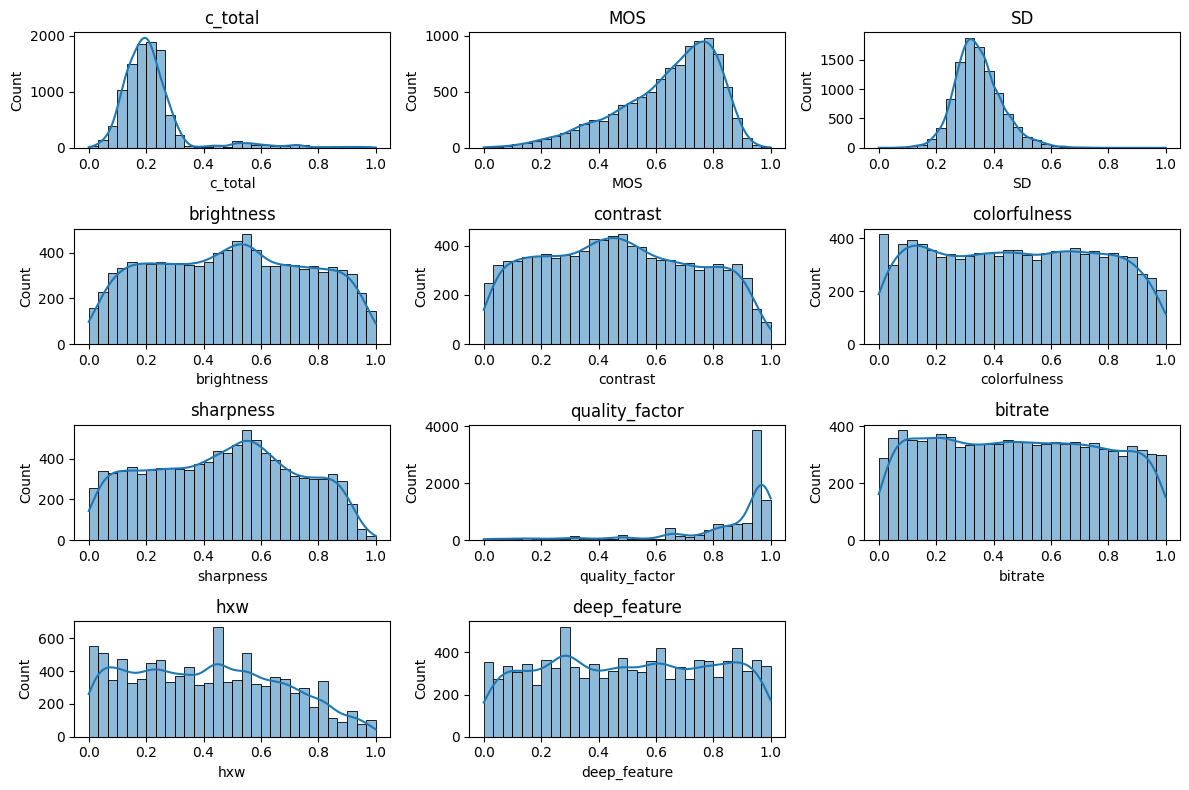

In [ ]:
# Define columns to visualize
columns_to_plot = ["c_total", "MOS", "SD", "brightness", "contrast",
                   "colorfulness", "sharpness", "quality_factor", "bitrate", "hxw", "deep_feature"]

# Set plot size
plt.figure(figsize=(12, 8))

# Plot each feature's distribution
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Creating subplots in a 4x3 grid
    sns.histplot(df_merged[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Resizing the Images

In [ ]:
# Define input and output folders
input_folder = "/content/drive/MyDrive/ML_IQA/koniq10k_1024x768/1024x768/"   # Change to your actual folder path
output_folder = "resized_images/"

# Create output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all image files in the input folder
for file in os.listdir(input_folder):
    if file.endswith((".jpg", ".png", ".jpeg")):  # Check for image files
        img_path = os.path.join(input_folder, file)  # Full path of the image
        img = cv2.imread(img_path)  # Read the image

        if img is None:
            print(f"Skipping {file}, unable to read.")
            continue

        # Resize image to 512 x 384
        img_resized = cv2.resize(img, (512, 384))

        # Save resized image
        output_path = os.path.join(output_folder, file)
        cv2.imwrite(output_path, img_resized)
        print(f"Resized and saved: {output_path}")

print("✅ All images resized and saved successfully!")

Streaming output truncated to the last 5000 lines.
Resized and saved: resized_images/5370637046.jpg
Resized and saved: resized_images/5364140480.jpg
Resized and saved: resized_images/5395880951.jpg
Resized and saved: resized_images/5398610144.jpg
Resized and saved: resized_images/5399475116.jpg
Resized and saved: resized_images/5423986833.jpg
Resized and saved: resized_images/540261908.jpg
Resized and saved: resized_images/5408161730.jpg
Resized and saved: resized_images/5421731776.jpg
Resized and saved: resized_images/5422890420.jpg
Resized and saved: resized_images/5408602889.jpg
Resized and saved: resized_images/5420375203.jpg
Resized and saved: resized_images/5403603296.jpg
Resized and saved: resized_images/5419570020.jpg
Resized and saved: resized_images/5409949181.jpg
Resized and saved: resized_images/5399327452.jpg
Resized and saved: resized_images/5406869186.jpg
Resized and saved: resized_images/5409637634.jpg
Resized and saved: resized_images/5398199748.jpg
Resized and saved: 

### Saved the resized Images to Drive

In [ ]:
! mv "/content/resized_images"  "/content/drive/MyDrive/ML_IQA/"

## Splitting the Data

In [20]:
x =df_merged.drop(['image_id','MOS'],axis=1) # features
y = df_merged[['MOS']]  #target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# x_train shape
x_train.shape

(8058, 10)

In [22]:
# y_train shape
x_test.shape

(2015, 10)

## Model Training

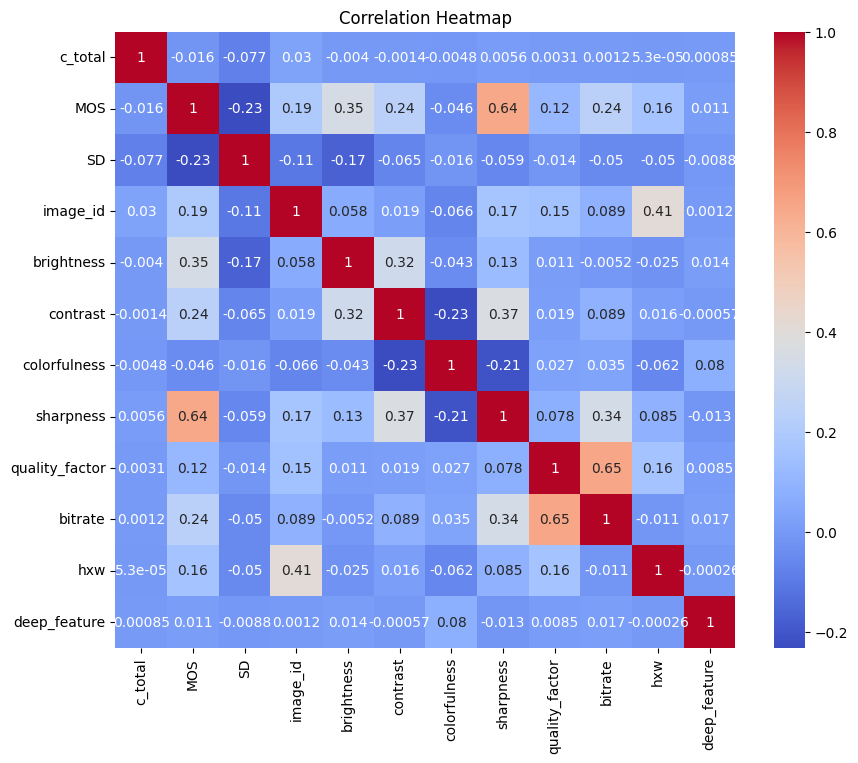

In [23]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Normalize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='rmse', metrics=['mae'])

# Display model summary
model.summary()


NameError: name 'keras' is not defined

In [32]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)


In [39]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - mae: 0.0413 - val_loss: 0.1500 - val_mae: 0.2954
Epoch 2/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mae: 0.0409 - val_loss: 0.1501 - val_mae: 0.2964
Epoch 3/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0029 - mae: 0.0411 - val_loss: 0.1521 - val_mae: 0.2983
Epoch 4/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - mae: 0.0436 - val_loss: 0.1552 - val_mae: 0.2999
Epoch 5/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - mae: 0.0410 - val_loss: 0.1521 - val_mae: 0.2977
Epoch 6/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - mae: 0.0396 - val_loss: 0.1496 - val_mae: 0.2947
Epoch 7/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - mae: 0.0398 - val_loss: 0.1505 - val_mae: 0.2940
Epoch 8/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023 - mae: 0.0372 - val_loss: 0.1510 - val_mae: 0.2962
Epoch 9/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [40]:
# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Predict MOS scores for test set
y_pred = model.predict(x_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1324 - mae: 0.2828
Test Loss (MSE): 0.14656749367713928
Test MAE: 0.29422226548194885
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [41]:
from sklearn.metrics import r2_score

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.5335


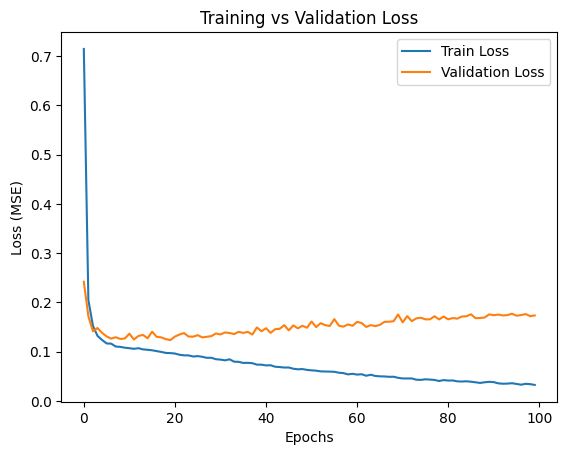

In [29]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [1]:
! pip install keras-tuner


^C
